In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import transformers

In [100]:
df=pd.read_csv('D:\KMITL\Year 3\Sentiment_Analysis\data.csv')
print(df.shape)
print(df.head)

(5842, 2)
<bound method NDFrame.head of                                                Sentence Sentiment
0     The GeoSolutions technology will leverage Bene...  positive
1     $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2     For the last quarter of 2010 , Componenta 's n...  positive
3     According to the Finnish-Russian Chamber of Co...   neutral
4     The Swedish buyout firm has sold its remaining...   neutral
...                                                 ...       ...
5837  RISING costs have forced packaging producer Hu...  negative
5838  Nordic Walking was first used as a summer trai...   neutral
5839  According shipping company Viking Line , the E...   neutral
5840  In the building and home improvement trade , s...   neutral
5841  HELSINKI AFX - KCI Konecranes said it has won ...  positive

[5842 rows x 2 columns]>


Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64


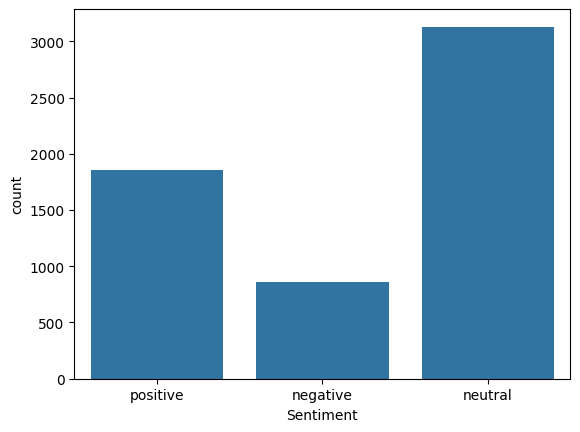

In [101]:
sentimentDist = df['Sentiment'].value_counts()

sns.countplot(x='Sentiment',data=df)
plt.show
print(sentimentDist)

In [102]:
#Try bag of word/VADER model approach
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tang-\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [103]:
df['Id'] = range(1, len(df) + 1)

In [104]:
res = {}
for i,row in df.iterrows():
    text = row['Sentence']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)
print(res)


{1: {'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'compound': 0.5423}, 2: {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.2023}, 3: {'neg': 0.064, 'neu': 0.856, 'pos': 0.08, 'compound': 0.1531}, 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 5: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 6: {'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.1695}, 7: {'neg': 0.222, 'neu': 0.778, 'pos': 0.0, 'compound': -0.25}, 8: {'neg': 0.065, 'neu': 0.847, 'pos': 0.088, 'compound': 0.2103}, 9: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 10: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 11: {'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.2732}, 12: {'neg': 0.231, 'neu': 0.655, 'pos': 0.114, 'compound': -0.4019}, 13: {'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'compound': 0.4404}, 14: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 15: {'neg': 0.0, 'neu': 0.936, 'pos': 0.064, 'compound': 0.296}, 16: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun

In [105]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df,how = 'left')
vaders.head()

,Id,neg,neu,pos,compound,Sentence,Sentiment
0,1,0.000,0.847,0.153,0.5423,The GeoSolutions technology will leverage Bene...,positive
1,2,0.167,0.833,0.000,-0.2023,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,3,0.064,0.856,0.080,0.1531,"For the last quarter of 2010 , Componenta 's n...",positive
3,4,0.000,1.000,0.000,0.0000,According to the Finnish-Russian Chamber of Co...,neutral
4,5,0.000,1.000,0.000,0.0000,The Swedish buyout firm has sold its remaining...,neutral


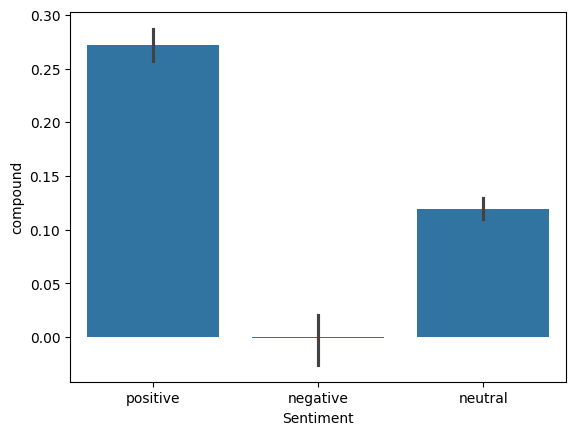

In [106]:
sns.barplot(data= vaders, x= 'Sentiment',y='compound')
plt.show()
#Vaders not good for negative but good for positive

<function matplotlib.pyplot.show(close=None, block=None)>

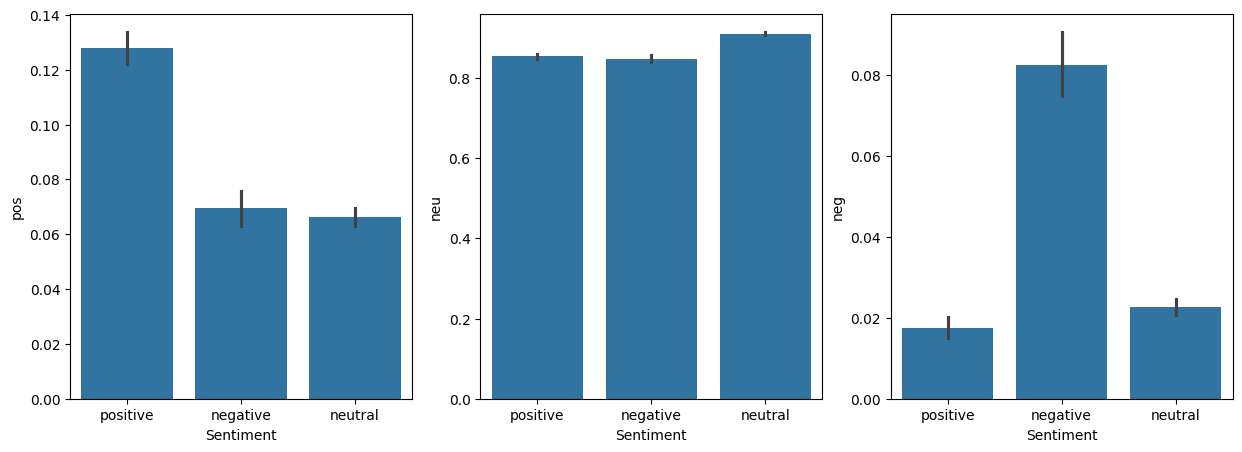

In [107]:
fig,axs = plt.subplots(1,3,figsize = (15,5))
sns.barplot(data=vaders, x='Sentiment',y='pos',ax=axs[0])
sns.barplot(data = vaders, x= 'Sentiment',y='neu',ax=axs[1])
sns.barplot(data = vaders, x= 'Sentiment',y='neg',ax=axs[2])
plt.show

In [108]:
#Naive bayes
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score




In [109]:
#text process
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
df2=pd.read_csv('D:\KMITL\Year 3\Sentiment_Analysis\data.csv')
def textprocess(sentences):
    if isinstance(sentences, str):
        tokens = word_tokenize(sentences)
        tokens = [word.lower() for word in tokens if word.isalnum()]
        stopWords = set(stopwords.words('english'))
        filtered = [word for word in tokens if word not in stopWords]
        return ' '.join(filtered)

print(df2.columns)

Index(['Sentence', 'Sentiment'], dtype='object')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tang-\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tang-\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [115]:
cleaned_sentences = []
for sentence in df2['Sentence']:
    cleaned_sentences.append(textprocess(sentence))
df2['CleanedSentence'] = df2['Sentence'].apply(textprocess)
df2.head()

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\tang-/nltk_data'
    - 'c:\\Users\\tang-\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data'
    - 'c:\\Users\\tang-\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data'
    - 'c:\\Users\\tang-\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data'
    - 'C:\\Users\\tang-\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
